Proyecto machine learning

Instituto Politécnico Nacional

ESCOM

Alvarado Romero Luis Manuel


Alejandre Dominguez Alan Jose

Materia: Machine learning

Grupo: 6CV3

In [77]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

# Banco de datos e imputacion de datos

Le damos acceso a nuestro google drive donde tenemos nuestro banco de datos para posteriormente abrir ese banco de datos

In [78]:
drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive/ProyectoMachine/')
df = pd.read_csv("/content/drive/MyDrive/ProyectoMachine/modified.csv")
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Sex  MaritalStatus  Age  Education  Occupation  YearsInSf  DualIncome  \
0       2            5.0    1        2.0         6.0        5.0           1   
1       2            5.0    1        2.0         6.0        3.0           1   
2       1            5.0    2        3.0         9.0        4.0           1   
3       1            5.0    2        4.0         9.0        5.0           1   
4       2            3.0    3        3.0         2.0        2.0           1   
...   ...            ...  ...        ...         ...        ...         ...   
8988    1            1.0    3        4.0         1.0        5.0           3   
8989    1            1.0    3        4.0         2.0        5.0           2   
8990    1            NaN    5        6.0         1.0        5.0           2   
8991    1            1.0    7        4.0         8.0        5.0           3   
89

Hacemos la division de nuestro dataframe original en distintos dataframe por clases

In [79]:
less10000 = df.iloc[0:1745]
between10000_14999 = df.iloc[1746:2520]
between15000_19999 = df.iloc[2520:3187]
between20000_24999 = df.iloc[3188:4000]
between25000_29999 = df.iloc[4001:4722]
between30000_39999 = df.iloc[4723:5832]
between40000_49999 = df.iloc[5833:6801]
between50000_74999 = df.iloc[6802:8109]
morethan75000 = df.iloc[8109:8993]

Se hace el calulo de los datos daltantes de cada nuevo dataset

In [80]:
print("Datos faltantes totales del banco: \n",df.isnull().sum(), "\n")
print("Ingreso anual menor a 10000 datos faltantes: \n")
print(less10000.isnull().sum(), "\n")
print("Ingreso anual entre 10000 y 14999 datos faltantes: \n")
print(between10000_14999.isnull().sum(), "\n")
print("Ingreso anual entre 15000 y 19999 datos faltantes: \n")
print(between15000_19999.isnull().sum(), "\n")
print("Ingreso anual entre 20000 y 24999 datos faltantes: \n")
print(between20000_24999.isnull().sum(), "\n")
print("Ingreso anual entre 25000 y 29999 datos faltantes: \n")
print(between25000_29999.isnull().sum(), "\n")
print("Ingreso anual entre 30000 y 39999 datos faltantes: \n")
print(between30000_39999.isnull().sum(), "\n")
print("Ingreso anual entre 40000 y 49999 datos faltantes: \n")
print(between40000_49999.isnull().sum(), "\n")
print("Ingreso anual entre 50000 y 74999 datos faltantes: \n")
print(between50000_74999.isnull().sum(), "\n")
print("Ingreso anual mayor a 75000 datos faltantes: \n")
print(morethan75000.isnull().sum(), "\n")

Datos faltantes totales del banco: 
 Sex                   0
MaritalStatus       160
Age                   0
Education            86
Occupation          136
YearsInSf           913
DualIncome            0
HouseholdMembers    375
Under18               0
HouseholdStatus     240
TypeOfHome          357
EthnicClass          68
Language            359
Class                 0
dtype: int64 

Ingreso anual menor a 10000 datos faltantes: 

Sex                   0
MaritalStatus        45
Age                   0
Education            21
Occupation           38
YearsInSf           201
DualIncome            0
HouseholdMembers    120
Under18               0
HouseholdStatus      51
TypeOfHome           95
EthnicClass          11
Language             67
Class                 0
dtype: int64 

Ingreso anual entre 10000 y 14999 datos faltantes: 

Sex                   0
MaritalStatus        16
Age                   0
Education             4
Occupation           19
YearsInSf           111
DualIncome       

Definimos nuestra funcion para la imputacion de datos


In [81]:
def Imputaciondatos(Dataframe):
  # Creamos el modelo para imputar los datos y se rellenaran con valores enteros
  s_imp = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=int)
  # Usamos una variable para pasarle nuestro dataframe que imputaremos
  datos = Dataframe
  # Convertimos los valores del dataset a arreglos
  datos = datos.values
  # Alimentamos al simple imputer con los arreglos excluyendo la ultima columna que es la clase
  s_imp = s_imp.fit(datos[ : , : -1])
  # transformamos los datos del dataset esto rellena los valores faltantes
  datos[:,:-1] = s_imp.transform(datos[ : , : -1])
  # convertimos nuestros arreglos ya transformados a dataframes, agregando la columna de nombres que se perdio en la conversion
  Dataframe = pd.DataFrame(datos,columns=["Sex","MaritalStatus","Age","Education","Occupation","YearsInSf","DualIncome","HouseholdMembers","Under18","HouseholdStatus","TypeOfHome","EthnicClass","Language","Class"])
  # Imprimimos nuestro Dataset para comprobar que si se rellenaron los valores al igual que ya no hay datos faltantes
  print(Dataframe)
  print("Comprobacion: \n")
  print(Dataframe.isnull().sum(), "\n")
  return Dataframe


Comenzamos con la imputacion de datos baados en nuestra funcion anterior

In [82]:
less10000=Imputaciondatos(less10000)
between10000_14999=Imputaciondatos(between10000_14999)
between15000_19999=Imputaciondatos(between15000_19999)
between20000_24999=Imputaciondatos(between20000_24999)
between25000_29999=Imputaciondatos(between25000_29999)
between30000_39999=Imputaciondatos(between30000_39999)
between40000_49999=Imputaciondatos(between40000_49999)
between50000_74999=Imputaciondatos(between50000_74999)
morethan75000=Imputaciondatos(morethan75000)

      Sex  MaritalStatus  Age  Education  Occupation  YearsInSf  DualIncome  \
0     2.0            5.0  1.0        2.0         6.0        5.0         1.0   
1     2.0            5.0  1.0        2.0         6.0        3.0         1.0   
2     1.0            5.0  2.0        3.0         9.0        4.0         1.0   
3     1.0            5.0  2.0        4.0         9.0        5.0         1.0   
4     2.0            3.0  3.0        3.0         2.0        2.0         1.0   
...   ...            ...  ...        ...         ...        ...         ...   
1740  1.0            5.0  1.0        2.0         6.0        5.0         1.0   
1741  2.0            5.0  1.0        2.0         6.0        5.0         1.0   
1742  1.0            5.0  2.0        4.0         4.0        2.0         1.0   
1743  2.0            5.0  1.0        1.0         2.0        5.0         1.0   
1744  2.0            5.0  1.0        2.0         1.0        5.0         1.0   

      HouseholdMembers  Under18  HouseholdStatus  T

Unimos nuestros dataframes para crear un dataframe ya sin datos faltantes

In [83]:
Marketing=pd.concat([less10000,between10000_14999,between15000_19999,between20000_24999,between25000_29999,between30000_39999,between40000_49999,between50000_74999,morethan75000],axis=0,ignore_index=True)
print(Marketing)
print(Marketing.isnull().sum(), "\n")

      Sex  MaritalStatus  Age  Education  Occupation  YearsInSf  DualIncome  \
0     2.0       5.000000  1.0        2.0         6.0        5.0         1.0   
1     2.0       5.000000  1.0        2.0         6.0        3.0         1.0   
2     1.0       5.000000  2.0        3.0         9.0        4.0         1.0   
3     1.0       5.000000  2.0        4.0         9.0        5.0         1.0   
4     2.0       3.000000  3.0        3.0         2.0        2.0         1.0   
...   ...            ...  ...        ...         ...        ...         ...   
8982  1.0       1.000000  3.0        4.0         1.0        5.0         3.0   
8983  1.0       1.000000  3.0        4.0         2.0        5.0         2.0   
8984  1.0       1.979405  5.0        6.0         1.0        5.0         2.0   
8985  1.0       1.000000  7.0        4.0         8.0        5.0         3.0   
8986  1.0       1.000000  3.0        6.0         1.0        5.0         2.0   

      HouseholdMembers  Under18  HouseholdStatus  T

Agregamos la funcion de balanceo de clases, para despues comenzar con el preprocesamiento de los datos


In [84]:
def BalanceoDB(Dataframe):
  # calculamos el Inbalance Rate del banco de datos original y lo guardamos en una lista
  ValuesPerClass = Dataframe["Class"].value_counts()
  # imprimimos nuestra cuenta de la cantidad de atributos por clase
  print(ValuesPerClass,"\n")
  # generamos las variables de clase minoritaria y clase mayoritaria y les asignamos el primer elemento del array
  clasemayori=max(ValuesPerClass)
  claseminori=min(ValuesPerClass)
  # imprimimos las clases mayoritarias y minoritarias
  print("Clase mayoritaria: ",clasemayori,)
  print("Clase minoritaria: ",claseminori,"\n")
  # calculamos el imbalance rate
  IR=clasemayori/claseminori
  # imprimimos nuestro imbalance rate
  print("El Imbalance Rate es de: ",IR,"\n")
  if IR>1.5:
    # dividimos nuestro banco de datos ya sin valores perdidos en datos numericos para x
    # y datos categoricos para y
    x=Dataframe.iloc[:,:-1]
    print(x)
    y=Dataframe["Class"]
    print(y)
    # vemos si ambos dataframe son iguales para pasarlos a el metodo SMOTE
    print(x.shape)
    print(y.shape)
    # creamos un objeto que contenga el metodo SMOTE
    sm=SMOTE()
    # pasamos nuestros dataframe a nuestro alimentar a nuestro resample
    # y balancear las clases
    x_res, y_res=sm.fit_resample(x,y)
    # concatenamos nuestros 2 dataframes resultantes para tener el final
    DataBbalanceado=pd.concat([x_res,y_res], axis=1)
    # imprimos nuestro banco de datos final
    print(DataBbalanceado)
    ValuesPerClassB = DataBbalanceado["Class"].value_counts()
    # imprimimos nuestra cuenta de la cantidad de atributos por clase
    print(ValuesPerClassB,"\n")
  return DataBbalanceado


In [85]:
MarketingB=BalanceoDB(Marketing)

1.0    1745
8.0    1307
6.0    1109
7.0     968
9.0     884
4.0     812
2.0     774
5.0     721
3.0     667
Name: Class, dtype: int64 

Clase mayoritaria:  1745
Clase minoritaria:  667 

El Imbalance Rate es de:  2.616191904047976 

      Sex  MaritalStatus  Age  Education  Occupation  YearsInSf  DualIncome  \
0     2.0       5.000000  1.0        2.0         6.0        5.0         1.0   
1     2.0       5.000000  1.0        2.0         6.0        3.0         1.0   
2     1.0       5.000000  2.0        3.0         9.0        4.0         1.0   
3     1.0       5.000000  2.0        4.0         9.0        5.0         1.0   
4     2.0       3.000000  3.0        3.0         2.0        2.0         1.0   
...   ...            ...  ...        ...         ...        ...         ...   
8982  1.0       1.000000  3.0        4.0         1.0        5.0         3.0   
8983  1.0       1.000000  3.0        4.0         2.0        5.0         2.0   
8984  1.0       1.979405  5.0        6.0         1.0    

# Algoritmos de clasificacion

Agregamos los Algoritmos de clasificacion para usarlos dentro de nuestro dataframe

In [86]:
def AlgoritmoKNNB(K,X,y,Dataframe):
    print("\n",K,"NN \n")
    # Creamos una variable en la cual guardamos nuestro K-fold para la validacion
    kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

    #Creamos nuestra variable con el algoritmo KNN
    neight=KNeighborsClassifier(n_neighbors=K)

    # Creamos una variable para guardar las metricas totales de nuestro KNN
    AcuracyT=0
    RecallT=0
    PrecisionT=0
    F1T=0
    i=0

    # Creamos un for para hacer la validacion e implementar el algoritmo KNN con el test y el train
    # Dividimos los indices en indicess de prueba y de entrenamiento
    for train_index, test_index in kf.split(X,y):

        # Creamos nuestro banco de datos de Entranamiento que dividio el K-fold
        Train=Dataframe.iloc[train_index]

        # Dividimos nuestro banco de datos de Entreamiento en valores y clases
        Trainv=Train.iloc[:,:-1]
        TrainC=Train.iloc[:,13:14]

        # Convertimos la clase de nuestro banco de Entrenamientos en un vector de 1 dimension con la funcion ravel
        TrainC=TrainC.values.ravel()

        # Creamos nuestro banco de datos de Prueba que dividio el K-fold
        Test=Dataframe.iloc[test_index]

        # Dividimos nuestro banco de datos de Prueba en valores y clases
        Testv=Test.iloc[:,:-1]
        Testc=Test.iloc[:,13:14]
        Testc=Testc.values.ravel()

        # Alimentamos al KNN con los valores del banco de entranamiento y la clase del banco de entranmiento
        neight.fit(Trainv,TrainC)

        # Vemos la prediccion que el algoritmo hace con base a los valores del banco de prueba
        Prediccion=neight.predict(Testv)

        # Comenzamos a calcular las metricas en base a la prediccion y las clases reales del banco de prueba
        Acuracy=accuracy_score(Testc,Prediccion)
        Recall=recall_score(Testc,Prediccion, average="macro")
        Precision=precision_score(Testc,Prediccion, average="macro")
        F1=f1_score(Testc,Prediccion, average="macro")

        # Calculamos las metricas totales de nuestro algoritmo
        AcuracyT=AcuracyT+Acuracy
        RecallT=Recall+RecallT
        PrecisionT=Precision+PrecisionT
        F1T=F1+F1T
        i=i+1

    # Dividimos las metricas totales entre la cantidad de folds que tenia nuestro algoritmo
    AcuracyT=AcuracyT/10
    RecallT=RecallT/10
    PrecisionT=PrecisionT/10
    F1T=F1T/10

    # Imprimimos nuestras metricas totales:
    print("\nMetricas totales con K= ",K)
    print("Exactitud: ",AcuracyT)
    print("Sensibilidad: ",RecallT)
    print("Presicion: ",PrecisionT)
    print("F1: ",F1T)

In [87]:
def AlgoritmoKNN(K,X,y,Dataframe):
    print("\n",K,"NN \n")
    # Creamos una variable en la cual guardamos nuestro K-fold para la validacion
    kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

    #Creamos nuestra variable con el algoritmo KNN
    neight=KNeighborsClassifier(n_neighbors=K)

    # Creamos una variable para guardar las metricas totales de nuestro KNN
    AcuracyT=0
    RecallT=0
    PrecisionT=0
    F1T=0
    i=0

    # Creamos un for para hacer la validacion e implementar el algoritmo KNN con el test y el train
    # Dividimos los indices en indicess de prueba y de entrenamiento
    for train_index, test_index in kf.split(X,y):

        # Creamos nuestro banco de datos de Entranamiento que dividio el K-fold
        Train=Dataframe.iloc[train_index]

        # Dividimos nuestro banco de datos de Entreamiento en valores y clases
        Trainv=Train.iloc[:,:-1]
        TrainC=Train.iloc[:,6:7]

        # Convertimos la clase de nuestro banco de Entrenamientos en un vector de 1 dimension con la funcion ravel
        TrainC=TrainC.values.ravel()

        # Creamos nuestro banco de datos de Prueba que dividio el K-fold
        Test=Dataframe.iloc[test_index]

        # Dividimos nuestro banco de datos de Prueba en valores y clases
        Testv=Test.iloc[:,:-1]
        Testc=Test.iloc[:,6:7]
        Testc=Testc.values.ravel()

        # Alimentamos al KNN con los valores del banco de entranamiento y la clase del banco de entranmiento
        neight.fit(Trainv,TrainC)

        # Vemos la prediccion que el algoritmo hace con base a los valores del banco de prueba
        Prediccion=neight.predict(Testv)

        # Comenzamos a calcular las metricas en base a la prediccion y las clases reales del banco de prueba
        Acuracy=accuracy_score(Testc,Prediccion)
        Recall=recall_score(Testc,Prediccion, average="macro")
        Precision=precision_score(Testc,Prediccion, average="macro")
        F1=f1_score(Testc,Prediccion, average="macro")

        # Calculamos las metricas totales de nuestro algoritmo
        AcuracyT=AcuracyT+Acuracy
        RecallT=Recall+RecallT
        PrecisionT=Precision+PrecisionT
        F1T=F1+F1T
        i=i+1

    # Dividimos las metricas totales entre la cantidad de folds que tenia nuestro algoritmo
    AcuracyT=AcuracyT/10
    RecallT=RecallT/10
    PrecisionT=PrecisionT/10
    F1T=F1T/10

    # Imprimimos nuestras metricas totales:
    print("\nMetricas totales con K= ",K)
    print("Exactitud: ",AcuracyT)
    print("Sensibilidad: ",RecallT)
    print("Presicion: ",PrecisionT)
    print("F1: ",F1T)

In [88]:
def AlgoritmoNBG(X,y,Dataframe):
  # Creamos una variable para guardar las metricas totales de nuestro Algoritmo
  AcuracyT=0
  RecallT=0
  PrecisionT=0
  F1T=0
  i=0

  # Creamos una variable en la cual guardamos nuestro K-fold para la validacion
  kf=StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

  # Creamos la variable en la que guardaremos el modelo de naive bayes gausiano
  nb = GaussianNB()

  # Creamos un for para hacer la validacion e implementar el algoritmo Naive Bayes con el test y el train
  # Dividimos los indices en indicess de prueba y de entrenamiento
  for train_index, test_index in kf.split(X,y):
    # Dividimos nuestro conjuntos de entrenamiento y prueba
    # Creamos nuestro banco de datos de Entranamiento que dividio el K-fold
    Train=Dataframe.iloc[train_index]

    # Dividimos nuestro banco de datos de Entreamiento en valores y clases
    Trainv=Train.iloc[:,:-1]
    TrainC=Train.iloc[:,13:14]

    # Convertimos la clase de nuestro banco de Entrenamientos en un vector de 1 dimension con la funcion ravel
    TrainC=TrainC.values.ravel()

    # Creamos nuestro banco de datos de Prueba que dividio el K-fold
    Test=Dataframe.iloc[test_index]

    # Dividimos nuestro banco de datos de Prueba en valores y clases
    Testv=Test.iloc[:,:-1]
    Testc=Test.iloc[:,13:14]
    Testc=Testc.values.ravel()

    # Entrenamos a nuestro algoritmo con los conjuntos de entrenamiento
    nb.fit(Trainv,TrainC)

    # Vemos la prediccion que hace el algoritmo con los valores de nuestro banco de pruebas
    Prediccion=nb.predict(Testv)

    # Comenzamos a calcular las metricas en base a la prediccion y las clases reales del banco de prueba
    Acuracy=accuracy_score(Testc,Prediccion)
    Recall=recall_score(Testc,Prediccion, average="macro")
    Precision=precision_score(Testc,Prediccion, average="macro")
    F1=f1_score(Testc,Prediccion, average="macro")

    # Calculamos las metricas totales de nuestro algoritmo
    AcuracyT=AcuracyT+Acuracy
    RecallT=Recall+RecallT
    PrecisionT=Precision+PrecisionT
    F1T=F1+F1T
    i=i+1

  # Dividimos las metricas totales entre la cantidad de folds que tenia nuestro algoritmo
  AcuracyT=AcuracyT/10
  RecallT=RecallT/10
  PrecisionT=PrecisionT/10
  F1T=F1T/10

  # Imprimimos nuestras metricas totales:
  print("\nMetricas totales: \n")
  print("Exactitud: ",AcuracyT)
  print("Sensibilidad: ",RecallT)
  print("Presicion: ",PrecisionT)
  print("F1: ",F1T)

In [89]:
def Algoritmoarboldecision(X,y,Dataframe):
  # Creamos una variable para guardar las metricas totales de nuestro Algoritmo
  AcuracyT=0
  RecallT=0
  PrecisionT=0
  F1T=0
  i=0

  # Creamos una variable en la cual guardamos nuestro K-fold para la validacion
  kf=StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

  # Creamos la variable en la que guardaremos el modelo del arbol de decision
  arbol=DecisionTreeClassifier()

  # Creamos un for para hacer la validacion e implementar el algoritmo Naive Bayes con el test y el train
  # Dividimos los indices en indicess de prueba y de entrenamiento
  for train_index, test_index in kf.split(X, y):
        # Creamos nuestro banco de datos de Entranamiento que dividio el K-fold
    Train=Dataframe.iloc[train_index]

    # Dividimos nuestro banco de datos de Entreamiento en valores y clases
    Trainv=Train.iloc[:,:-1]
    TrainC=Train.iloc[:,13:14]

    # Convertimos la clase de nuestro banco de Entrenamientos en un vector de 1 dimension con la funcion ravel
    TrainC=TrainC.values.ravel()

    # Creamos nuestro banco de datos de Prueba que dividio el K-fold
    Test=Dataframe.iloc[test_index]

    # Dividimos nuestro banco de datos de Prueba en valores y clases
    Testv=Test.iloc[:,:-1]
    Testc=Test.iloc[:,13:14]
    Testc=Testc.values.ravel()

    # Entrenamos a nuestro algoritmo con los conjuntos de entrenamiento
    arbol.fit(Trainv,TrainC)

    # Vemos la prediccion que hace el algoritmo con los valores de nuestro banco de pruebas
    Prediccion=arbol.predict(Testv)

    # Comenzamos a calcular las metricas en base a la prediccion y las clases reales del banco de prueba
    Acuracy=accuracy_score(Testc,Prediccion)
    Recall=recall_score(Testc,Prediccion, average="macro")
    Precision=precision_score(Testc,Prediccion, average="macro")
    F1=f1_score(Testc,Prediccion, average="macro")

    # Calculamos las metricas totales de nuestro algoritmo
    AcuracyT=AcuracyT+Acuracy
    RecallT=Recall+RecallT
    PrecisionT=Precision+PrecisionT
    F1T=F1+F1T
    i=i+1

  # Dividimos las metricas totales entre la cantidad de folds que tenia nuestro algoritmo
  AcuracyT=AcuracyT/10
  RecallT=RecallT/10
  PrecisionT=PrecisionT/10
  F1T=F1T/10

  # Imprimimos nuestras metricas totales:
  print("\nMetricas totales: \n")
  print("Exactitud: ",AcuracyT)
  print("Sensibilidad: ",RecallT)
  print("Presicion: ",PrecisionT)
  print("F1: ",F1T)

In [90]:
def AlgoritmoRedesneuronales(Learnr,X,y,Dataframe):
# Creamos una variable para guardar las metricas totales de nuestro Algoritmo
  AcuracyT=0
  RecallT=0
  PrecisionT=0
  F1T=0
  i=0

  # Creamos una variable en la cual guardamos nuestro K-fold para la validacion
  kf=StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

  # Creamos la variable en la que guardaremos el modelo de la red neuronal
  Redn=MLPClassifier(hidden_layer_sizes=50,activation='tanh',solver='sgd',learning_rate_init=Learnr,validation_fraction=0.2)

  # Creamos un for para hacer la validacion e implementar de redes neuronales  con el test y el train
  # Dividimos los indices en indicess de prueba y de entrenamiento
  for train_index, test_index in kf.split(X,y):
    # Dividimos nuestro conjuntos de entrenamiento y prueba
        # Creamos nuestro banco de datos de Entranamiento que dividio el K-fold
    Train=Dataframe.iloc[train_index]

    # Dividimos nuestro banco de datos de Entreamiento en valores y clases
    Trainv=Train.iloc[:,:-1]
    TrainC=Train.iloc[:,13:14]

    # Convertimos la clase de nuestro banco de Entrenamientos en un vector de 1 dimension con la funcion ravel
    TrainC=TrainC.values.ravel()

    # Creamos nuestro banco de datos de Prueba que dividio el K-fold
    Test=Dataframe.iloc[test_index]

    # Dividimos nuestro banco de datos de Prueba en valores y clases
    Testv=Test.iloc[:,:-1]
    Testc=Test.iloc[:,13:14]
    Testc=Testc.values.ravel()

    # Alimentamos a nuestro algoritmo con el conjunto de entrenamiento
    Redn.fit(Trainv,TrainC)

    #Vemos la prediccion que hace el algoritmo con nuestro banco de pruebas
    Prediccion=Redn.predict(Testv)
    Acuracy=accuracy_score(Testc,Prediccion)
    Recall=recall_score(Testc,Prediccion, average="macro")
    Precision=precision_score(Testc,Prediccion, average="macro")
    F1=f1_score(Testc,Prediccion, average="macro")

    # Calculamos las metricas totales de nuestro algoritmo
    AcuracyT=AcuracyT+Acuracy
    RecallT=Recall+RecallT
    PrecisionT=Precision+PrecisionT
    F1T=F1+F1T
    i=i+1

  # Dividimos las metricas totales entre la cantidad de folds que tenia nuestro algoritmo
  AcuracyT=AcuracyT/10
  RecallT=RecallT/10
  PrecisionT=PrecisionT/10
  F1T=F1T/10

  # Imprimimos nuestras metricas totales:
  print("\nMetricas totales: \n")
  print("Exactitud: ",AcuracyT)
  print("Sensibilidad: ",RecallT)
  print("Presicion: ",PrecisionT)
  print("F1: ",F1T)

# Primer Preprocesamiento

Creamos un dataframe con las clases balanceadas para probar si hay diferencia en la clasificacion con un dataset sin balancear

In [91]:
MarketingB=BalanceoDB(Marketing)

1.0    1745
8.0    1307
6.0    1109
7.0     968
9.0     884
4.0     812
2.0     774
5.0     721
3.0     667
Name: Class, dtype: int64 

Clase mayoritaria:  1745
Clase minoritaria:  667 

El Imbalance Rate es de:  2.616191904047976 

      Sex  MaritalStatus  Age  Education  Occupation  YearsInSf  DualIncome  \
0     2.0       5.000000  1.0        2.0         6.0        5.0         1.0   
1     2.0       5.000000  1.0        2.0         6.0        3.0         1.0   
2     1.0       5.000000  2.0        3.0         9.0        4.0         1.0   
3     1.0       5.000000  2.0        4.0         9.0        5.0         1.0   
4     2.0       3.000000  3.0        3.0         2.0        2.0         1.0   
...   ...            ...  ...        ...         ...        ...         ...   
8982  1.0       1.000000  3.0        4.0         1.0        5.0         3.0   
8983  1.0       1.000000  3.0        4.0         2.0        5.0         2.0   
8984  1.0       1.979405  5.0        6.0         1.0    

## Pruebas con KNN

Creamos un vector con esos valores

Probamos si el preprocesamiento de los datos mejora las metricas de nuestro dataframe con el KNN

Dividimos nuestro dataset con solo los valores sin la clase

In [92]:
X = Marketing.iloc[:,:-1]
Xt = MarketingB.iloc[:,:-1]

Realizamos lo mismo pero ahora con la clase

In [93]:
X=X.values
Xt=Xt.values

In [94]:
y=Marketing['Class']
yt=MarketingB['Class']
y=y.values
yt=yt.values

Pruebas con el Data frame sin balancear






In [95]:
for K in [1, 4, 7]:
  AlgoritmoKNNB(K,X,y,Marketing)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.2819597870437581
Sensibilidad:  0.2382848333593537
Presicion:  0.23954241265419624
F1:  0.2366196555236892

 4 NN 


Metricas totales con K=  4
Exactitud:  0.2957624284344644
Sensibilidad:  0.23953594471713585
Presicion:  0.23852196282159932
F1:  0.23077991195316588

 7 NN 


Metricas totales con K=  7
Exactitud:  0.31133664972959313
Sensibilidad:  0.2541402313978339
Presicion:  0.25748661896844166
F1:  0.24859661082431747


Pruebas con el dataframe balanceado



In [96]:
for K in [1, 4, 7]:
  AlgoritmoKNNB(K,Xt,yt,MarketingB)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.6745619042599343
Sensibilidad:  0.6745517241379311
Presicion:  0.672529469226052
F1:  0.6706410211579572

 4 NN 


Metricas totales con K=  4
Exactitud:  0.5564466626393185
Sensibilidad:  0.5564641488779419
Presicion:  0.5558253228642412
F1:  0.5510344128772584

 7 NN 


Metricas totales con K=  7
Exactitud:  0.5087551439912101
Sensibilidad:  0.5087688378033206
Presicion:  0.5088056668086359
F1:  0.5037293323094738


# Segundo Preprocesamiento

In [97]:
#Creamos la matriz de correlacion
matriz_correlacion = Marketing.corr().round(2)
matriz_correlacion

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
Sex,1.00,-0.09,0.03,-0.06,0.03,0.06,0.06,0.05,0.07,-0.04,-0.03,0.03,-0.05,-0.04
MaritalStatus,-0.09,1.00,-0.50,-0.26,0.17,-0.09,-0.78,-0.02,-0.03,0.58,0.15,-0.08,0.05,-0.49
Age,0.03,-0.50,1.00,0.35,0.01,0.18,0.42,-0.29,-0.25,-0.63,-0.09,0.17,-0.09,0.39
Education,-0.06,-0.26,0.35,1.00,-0.36,-0.05,0.15,-0.29,-0.27,-0.43,0.01,0.14,-0.13,0.46
Occupation,0.03,0.17,0.01,-0.36,1.00,0.01,0.01,0.09,0.06,0.22,0.02,-0.04,0.06,-0.36
YearsInSf,0.06,-0.09,0.18,-0.05,0.01,1.00,0.08,0.06,0.06,-0.10,-0.22,-0.01,-0.07,0.10
DualIncome,0.06,-0.78,0.42,0.15,0.01,0.08,1.00,0.09,0.08,-0.47,-0.18,0.08,-0.02,0.37
HouseholdMembers,0.05,-0.02,-0.29,-0.29,0.09,0.06,0.09,1.00,0.69,0.23,-0.28,-0.13,0.16,-0.08
Under18,0.07,-0.03,-0.25,-0.27,0.06,0.06,0.08,0.69,1.00,0.16,-0.19,-0.12,0.10,-0.09
HouseholdStatus,-0.04,0.58,-0.63,-0.43,0.22,-0.10,-0.47,0.23,0.16,1.00,0.13,-0.14,0.11,-0.52


Se crea el mapa de calor

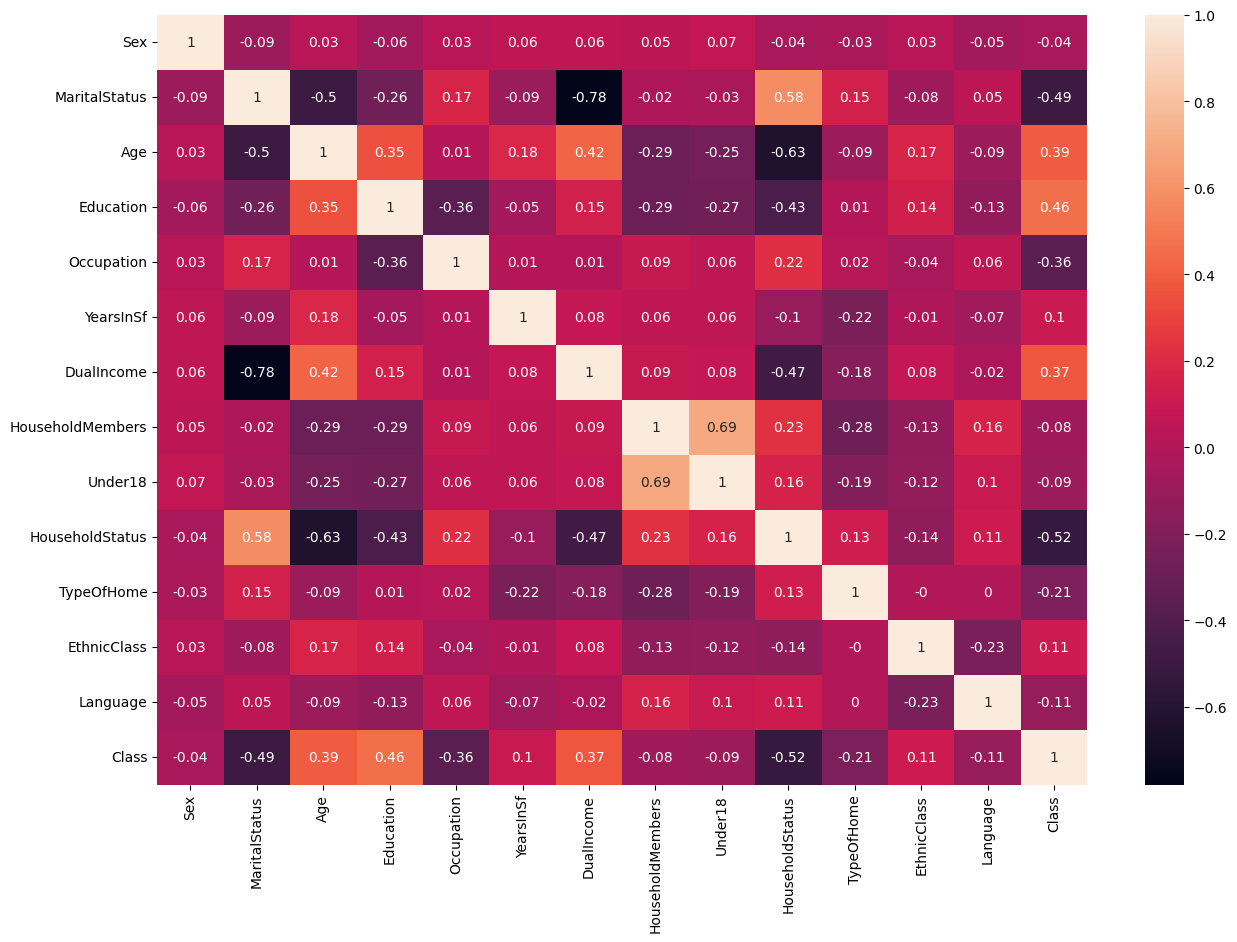

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

Aqui pondremos solo los rasgos que tienen una mayor correlacion con la clase

In [99]:
just_this=['MaritalStatus','Age','Education','Occupation','DualIncome','HouseholdStatus','Class']
Marketing2 = MarketingB[just_this]
Marketing2

,MaritalStatus,Age,Education,Occupation,DualIncome,HouseholdStatus,Class
0,5.000000,1.000000,2.000000,6.0,1.0,3.000000,1.0
1,5.000000,1.000000,2.000000,6.0,1.0,3.000000,1.0
2,5.000000,2.000000,3.000000,9.0,1.0,2.000000,1.0
3,5.000000,2.000000,4.000000,9.0,1.0,2.000000,1.0
4,3.000000,3.000000,3.000000,2.0,1.0,2.000000,1.0
...,...,...,...,...,...,...,...
15700,2.932589,2.932589,5.865177,6.0,1.0,1.067411,9.0
15701,1.000000,4.000000,5.000000,1.0,2.0,1.000000,9.0
15702,1.000000,5.457678,4.000000,5.0,3.0,1.000000,9.0
15703,1.000000,4.000000,6.000000,1.0,2.0,1.000000,9.0


## Pruebas con KNN

Creamos un vector con esos valores

Probamos si el preprocesamiento de los datos mejora las metricas de nuestro dataframe con el KNN

Dividimos nuestro dataset con solo los valores sin la clase

In [100]:
X = MarketingB.iloc[:,:-1]
Xt = Marketing2.iloc[:,:-1]

Realizamos lo mismo pero ahora con la clase

In [101]:
X=X.values
Xt=Xt.values

In [102]:
y=MarketingB['Class']
yt=Marketing2['Class']
y=y.values
yt=yt.values

Pruebas con el Data frame Balanceado







In [103]:
for K in [1, 4, 7]:
  AlgoritmoKNNB(K,X,y,MarketingB)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.6739891829213411
Sensibilidad:  0.674004743659916
Presicion:  0.6720626118974541
F1:  0.6702721147198761

 4 NN 


Metricas totales con K=  4
Exactitud:  0.5546644394620652
Sensibilidad:  0.5546787082649153
Presicion:  0.5529889506722807
F1:  0.548912215965449

 7 NN 


Metricas totales con K=  7
Exactitud:  0.5102208013882189
Sensibilidad:  0.5102149242838898
Presicion:  0.5100650625193769
F1:  0.5051634010369207


Pruebas con el dataframe con el segundo Preprocesamiento



In [104]:
for K in [1, 4, 7]:
  AlgoritmoKNN(K,Xt,yt,Marketing2)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.3230818538234805
Sensibilidad:  0.323071702244116
Presicion:  0.32669518887562976
F1:  0.30621328493312483

 4 NN 


Metricas totales con K=  4
Exactitud:  0.3140420925452164
Sensibilidad:  0.31404853128991067
Presicion:  0.3179968586427929
F1:  0.29268800996398403

 7 NN 


Metricas totales con K=  7
Exactitud:  0.31887843760516044
Sensibilidad:  0.3188885239919723
Presicion:  0.3180843097315979
F1:  0.3024143074634525


# Tercer Preprocesamiento

In [105]:
Marketing3=MarketingB
Marketing3=Marketing3.drop_duplicates()
Marketing3


,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,2.000000,5.000000,1.000000,2.000000,6.0,5.000000,1.0,4.000000,2.0,3.000000,1.000000,7.0,1.0,1.0
1,2.000000,5.000000,1.000000,2.000000,6.0,3.000000,1.0,4.000000,2.0,3.000000,1.000000,7.0,1.0,1.0
2,1.000000,5.000000,2.000000,3.000000,9.0,4.000000,1.0,3.000000,1.0,2.000000,3.000000,7.0,1.0,1.0
3,1.000000,5.000000,2.000000,4.000000,9.0,5.000000,1.0,1.000000,0.0,2.000000,3.000000,7.0,1.0,1.0
4,2.000000,3.000000,3.000000,3.000000,2.0,2.000000,1.0,2.000000,1.0,2.000000,3.000000,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15700,2.000000,2.932589,2.932589,5.865177,6.0,2.000000,1.0,2.932589,0.0,1.067411,1.134823,7.0,1.0,9.0
15701,1.877619,1.000000,4.000000,5.000000,1.0,5.000000,2.0,4.000000,1.0,1.000000,1.000000,7.0,1.0,9.0
15702,2.000000,1.000000,5.457678,4.000000,5.0,5.000000,3.0,3.000000,0.0,1.000000,1.174902,7.0,1.0,9.0
15703,2.000000,1.000000,4.000000,6.000000,1.0,4.833613,2.0,4.000000,2.0,1.000000,1.000000,7.0,1.0,9.0


## Pruebas con KNN

Creamos un vector con esos valores

Probamos si el preprocesamiento de los datos mejora las metricas de nuestro dataframe con el KNN

Dividimos nuestro dataset con solo los valores sin la clase

In [106]:
X = MarketingB.iloc[:,:-1]
Xt = Marketing3.iloc[:,:-1]

Realizamos lo mismo pero ahora con la clase

In [107]:
X=X.values
Xt=Xt.values

In [108]:
y=MarketingB['Class']
yt=Marketing3['Class']
y=y.values
yt=yt.values

Pruebas con el Data frame Balanceado







In [109]:
for K in [1, 4, 7]:
  AlgoritmoKNNB(K,X,y,MarketingB)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.6722692349795455
Sensibilidad:  0.6722703886152163
Presicion:  0.6702205214878929
F1:  0.6684664471703268

 4 NN 


Metricas totales con K=  4
Exactitud:  0.5538362112654929
Sensibilidad:  0.5538405400474365
Presicion:  0.5522793489650653
F1:  0.5480149428974375

 7 NN 


Metricas totales con K=  7
Exactitud:  0.5061409625902605
Sensibilidad:  0.5061532567049809
Presicion:  0.505756128112451
F1:  0.5010018953330134


Pruebas con el dataframe con el Tercer Preprocesamiento



In [110]:
for K in [1, 4, 7]:
  AlgoritmoKNNB(K,Xt,yt,Marketing3)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.6730221804750107
Sensibilidad:  0.6691416624787356
Presicion:  0.6683279480089723
F1:  0.6658061092834417

 4 NN 


Metricas totales con K=  4
Exactitud:  0.5481298610543893
Sensibilidad:  0.5454065792650338
Presicion:  0.5454637670167408
F1:  0.539388293701215

 7 NN 


Metricas totales con K=  7
Exactitud:  0.5003038017188961
Sensibilidad:  0.49861468757092914
Presicion:  0.49948148544172266
F1:  0.4925124173380692


# Clasificacion

In [111]:
X = MarketingB.iloc[:,:-1]
X=X.values
y=MarketingB['Class']
y=y.values

## Clasificacion con KNN

In [112]:
for K in [1, 4, 7]:
  AlgoritmoKNNB(K,X,y,MarketingB)


 1 NN 


Metricas totales con K=  1
Exactitud:  0.6727791945574039
Sensibilidad:  0.672768472906404
Presicion:  0.6719207141756912
F1:  0.6696042488725521

 4 NN 


Metricas totales con K=  4
Exactitud:  0.5547278499231696
Sensibilidad:  0.5547301587301587
Presicion:  0.5538787419712016
F1:  0.5494556047056178

 7 NN 


Metricas totales con K=  7
Exactitud:  0.5081808009016935
Sensibilidad:  0.5081769750045613
Presicion:  0.50863542326408
F1:  0.5034740176421784


## Clasificacion con Naive Bayes

In [113]:
AlgoritmoNBG(X,y,MarketingB)


Metricas totales: 

Exactitud:  0.2624653046661828
Sensibilidad:  0.26247254150702426
Presicion:  0.24038068306234256
F1:  0.22738979071929838


## Clasificacion con Arbol de desicion

In [114]:
Algoritmoarboldecision(X,y,MarketingB)


Metricas totales: 

Exactitud:  0.4741155173182727
Sensibilidad:  0.47412187557015145
Presicion:  0.47515411507450966
F1:  0.4741788690074394


## Clasificacion con red neuronal

In [115]:
for Learnr in [0.01, 0.001, 0.0001]:
  AlgoritmoRedesneuronales(Learnr,X,y,MarketingB)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Metricas totales: 

Exactitud:  0.3427588010395423
Sensibilidad:  0.3427765006385696
Presicion:  0.3378044574959794
F1:  0.3324238853801262


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Metricas totales: 

Exactitud:  0.3075469800970618
Sensibilidad:  0.30756431308155446
Presicion:  0.29427070387270204
F1:  0.2966572128986543


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Metricas totales: 

Exactitud:  0.2776822746678452
Sensibilidad:  0.2776723225688743
Presicion:  0.25235194060512905
F1:  0.2555039828080678


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
